# Machine Learning And Content Analysis

## Get Spotify playlist based on a given input text

By the end of this assignment, the user will be able to give a text as an input, and have a playlist created in his __Spotify__ account, expressing the input text the user gave. 


### Loading packages

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import os
import datetime
import time

os.chdir(r'C:\Users\kosta\OneDrive\MSCBA\ML_Assignment')

### Read the data collected in the other notebooks

- The _lyricsdf_ dataframe contains .., through the process that took place in the __Get Lyrics__ Notebook
- The _pool_ DataFrame contains..

In [2]:
lyricsdf = pd.read_csv('lyrics-b.csv')

In [3]:
pool = pd.read_csv('tracks-c.csv')

pool = pool[['release_date','id','name','artists','energy','popularity','danceability','valence','acousticness','liveness']]
pool['comp'] = pool.iloc[:,4:10].values.tolist()

pool['Y'] = pd.to_datetime(pool['release_date']).dt.year

# Scaling Data

- The data on the dataset appear to be in different scales
- To combat this we are going to use Min Max Scaler, to scale the data

In [4]:
lyricsdf  = lyricsdf[['track_name', 'artist', 'genre', 'track_id', 'lyrics','energy','popularity','danceability','valence','acousticness','liveness']] 

Since we deal with unscaled data, and we are going to use distance later on, scaling is needed to acquire proper results

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

lyricsdf[['energy','popularity','danceability','valence','acousticness','liveness']] =scaler.fit_transform(lyricsdf[['energy','popularity','danceability','valence','acousticness','liveness']])
pool[['energy','popularity','danceability','valence','acousticness','liveness']] =scaler.fit_transform(pool[['energy','popularity','danceability','valence','acousticness','liveness']])

# Text processing

In this part, we are going to adress the 'lyrics' column, take care of the text in order for it to be ready to be tokenized later via TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import nltk
import string

from matplotlib import pyplot as plt

In [7]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kosta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def text_clean(x):
    word = 'lyrics'
    pattern  = ".*" + word
    x  = re.sub(pattern, '', x)
    x = x.lower() 
    x = x.encode('ascii', 'ignore').decode() 
    x = re.sub(r'\'\w+', '', x) 
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    x = ' '.join([word for word in x.split(' ') if word not in stopwords])
    return x

In [9]:
lyricsdf['lyrics'] = lyricsdf.lyrics.apply(text_clean)

In [10]:
lyrics = lyricsdf['lyrics']
corpora = " ".join(lyrics)

print(corpora[:1000])

funeral lyrics
i went funeral, could feel something
don know living feel nothing
and without now? see head
getting high nature girl, wish best oh, time think you, empty-hearted
oh, tell got far started welcome funeral, nice came
here final eulogy us name
oh, could love right, know right?
you know yourself
love eternal light ours, died (oh)
oh, anytime think you, empty-hearted
oh, tell got far started
oh, anytime think you, empty-hearted
oh, tell got far started welcome funeral, nice cameembed distress lyricsheard favorite song radio
i get tired know
is whole life coming me
or problem anxiety
she said
spent last days wide awake
and know much take
i one life live
and want give can
even though something right
we really want fatal fever got feeling tonight
i want know
i wanna go
i wanna take far away
i say night night time gonna friend know
half past two stepped into
the place want be
oooh might lay head
i trying find sleep
well three days since good meal
i without beer four
and know wake 

In [11]:
X = lyricsdf['lyrics']

In [12]:
yenergy = lyricsdf['energy']
ypopularity = lyricsdf['popularity']
ydanceability = lyricsdf['danceability']
yvalence = lyricsdf['valence']
yacousticness = lyricsdf['acousticness']
yliveness = lyricsdf['liveness']

# Train - Test Splits

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train_val, X_test, y_train_val_energy, y_test_energy = train_test_split(X,
                                                            yenergy,
                                                            test_size=0.20,
                                                            random_state=42)

In [15]:
X_train, X_val, y_train_energy, y_val_energy = train_test_split(X_train_val,
                                                  y_train_val_energy,
                                                  test_size=0.20, 
                                                  random_state=42)

Now we want to recreate the same split for the rest of Ys

In [16]:
y_train_val_popularity = ypopularity[y_train_val_energy.index]
y_train_popularity = ypopularity[y_train_energy.index]
y_val_popularity = ypopularity[y_val_energy.index]
y_test_popularity = ypopularity[y_test_energy.index]

In [17]:
y_train_val_danceability = ydanceability[y_train_val_energy.index]
y_train_danceability = ydanceability[y_train_energy.index]
y_val_danceability = ydanceability[y_val_energy.index]
y_test_danceability = ydanceability[y_test_energy.index]

In [18]:
y_train_val_valence = yvalence[y_train_val_energy.index]
y_train_valence = yvalence[y_train_energy.index]
y_val_valence = yvalence[y_val_energy.index]
y_test_valence = yvalence[y_test_energy.index]

In [19]:
y_train_val_acousticness = yacousticness[y_train_val_energy.index]
y_train_acousticness = yacousticness[y_train_energy.index]
y_val_acousticness = yacousticness[y_val_energy.index]
y_test_acousticness = yacousticness[y_test_energy.index]

In [20]:
y_train_val_liveness = yliveness[y_train_val_energy.index]
y_train_liveness = yliveness[y_train_energy.index]
y_val_liveness = yliveness[y_val_energy.index]
y_test_liveness = yliveness[y_test_energy.index]

In [21]:
print('Train - Validations Shapes')
print(40*'-')
print()
print(f'X_train_val shape: {X_train_val.shape}')
print(f'y_train_val_energy shape: {y_train_val_energy.shape}')
print(f'y_train_val_popularity shape: {y_train_val_popularity.shape}')
print(f'y_train_val_danceability shape: {y_train_val_danceability.shape}')
print(f'y_train_val_valence shape: {y_train_val_valence.shape}')
print(f'y_train_val_acousticness shape: {y_train_val_acousticness.shape}')
print(f'y_train_val_liveness shape: {y_train_val_liveness.shape}')
print(40*'-')
print()

print('Train Shapes')
print(40*'-')
print()
print(f'X_train shape: {X_train.shape}')
print(f'y_train_energy shape: {y_train_energy.shape}')
print(f'y_train_popularity shape: {y_train_popularity.shape}')
print(f'y_train_danceability shape: {y_train_danceability.shape}')
print(f'y_train_valence shape: {y_train_valence.shape}')
print(f'y_train_acousticness shape: {y_train_acousticness.shape}')
print(f'y_train_liveness shape: {y_train_liveness.shape}')
print(40*'-')
print()

print('Validation Shapes')
print(40*'-')
print()
print(f'X_val shape: {X_val.shape}')
print(f'y_val_energy shape: {y_val_energy.shape}')
print(f'y_val_popularity shape: {y_val_popularity.shape}')
print(f'y_val_danceability shape: {y_val_danceability.shape}')
print(f'y_val_valence shape: {y_val_valence.shape}')
print(f'y_val_acousticness shape: {y_val_acousticness.shape}')
print(f'y_val_liveness shape: {y_val_liveness.shape}')
print(40*'-')
print()

print('Test Shapes')
print(40*'-')
print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test_energy shape: {y_test_energy.shape}')
print(f'y_test_popularity shape: {y_test_popularity.shape}')
print(f'y_test_danceability shape: {y_test_danceability.shape}')
print(f'y_test_valence shape: {y_test_valence.shape}')
print(f'y_test_acousticness shape: {y_test_acousticness.shape}')
print(f'y_test_liveness shape: {y_test_liveness.shape}')
print(40*'-')
print()

Train - Validations Shapes
----------------------------------------

X_train_val shape: (14902,)
y_train_val_energy shape: (14902,)
y_train_val_popularity shape: (14902,)
y_train_val_danceability shape: (14902,)
y_train_val_valence shape: (14902,)
y_train_val_acousticness shape: (14902,)
y_train_val_liveness shape: (14902,)
----------------------------------------

Train Shapes
----------------------------------------

X_train shape: (11921,)
y_train_energy shape: (11921,)
y_train_popularity shape: (11921,)
y_train_danceability shape: (11921,)
y_train_valence shape: (11921,)
y_train_acousticness shape: (11921,)
y_train_liveness shape: (11921,)
----------------------------------------

Validation Shapes
----------------------------------------

X_val shape: (2981,)
y_val_energy shape: (2981,)
y_val_popularity shape: (2981,)
y_val_danceability shape: (2981,)
y_val_valence shape: (2981,)
y_val_acousticness shape: (2981,)
y_val_liveness shape: (2981,)
--------------------------------------

# Tokenization with TF-IDF

In [22]:
max_words = 4000

In [23]:
vectorizer = TfidfVectorizer(
    encoding ='utf-8',
    strip_accents ='unicode',
    lowercase = True,
    stop_words = stopwords,
    ngram_range =(1, 1),
    max_features = max_words
)

In [24]:
import pickle
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [25]:
X_train_enc = vectorizer.fit_transform(X_train)
X_val_enc = vectorizer.transform(X_val)
X_test_enc = vectorizer.transform(X_test)

In [26]:
print(f'X_train encoded shape: {X_train_enc.shape}')
print(f'X_val encoded shape: {X_val_enc.shape}')
print(f'X_test encoded shape: {X_test_enc.shape}')

X_train encoded shape: (11921, 4000)
X_val encoded shape: (2981, 4000)
X_test encoded shape: (3726, 4000)


In [27]:
y_train_energy = y_train_energy.values.reshape(-1, 1)
y_val_energy = y_val_energy.values.reshape(-1, 1)
y_test_energy = y_test_energy.values.reshape(-1, 1)

In [28]:
y_train_popularity = y_train_popularity.values.reshape(-1, 1)
y_val_popularity = y_val_popularity.values.reshape(-1, 1)
y_test_popularity = y_test_popularity.values.reshape(-1, 1)

In [29]:
y_train_danceability = y_train_danceability.values.reshape(-1, 1)
y_val_danceability = y_val_danceability.values.reshape(-1, 1)
y_test_danceability = y_test_danceability.values.reshape(-1, 1)

In [30]:
y_train_valence = y_train_valence.values.reshape(-1, 1)
y_val_valence = y_val_valence.values.reshape(-1, 1)
y_test_valence = y_test_valence.values.reshape(-1, 1)

In [31]:
y_train_acousticness = y_train_acousticness.values.reshape(-1, 1)
y_val_acousticness = y_val_acousticness.values.reshape(-1, 1)
y_test_acousticness = y_test_acousticness.values.reshape(-1, 1)

In [32]:
y_train_liveness = y_train_liveness.values.reshape(-1, 1)
y_val_liveness = y_val_liveness.values.reshape(-1, 1)
y_test_liveness = y_test_liveness.values.reshape(-1, 1)

# MODELS

We are going to train 12 RNN models half of them using the _Adam_ optimizer and the other half using the _Stochastic Gradient Descent(SGD)_ optimizer, with the help of Keras.
Then, we are going to fit each audio feature to these models to get predictions of audio features.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import pydot

import time

In [34]:
nb_epoch = 30
batch_size = 32 
dropout_rate = 0.2

In [35]:
# We are going to use this function to plot history of the models and assess their training loss/accuracy

def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

# Energy Model

In [36]:
%%time

print('Building Energy Model with Adam optimizer..')

energymodel = Sequential()

energymodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

energymodel.add(Dense(256, activation='relu'))

energymodel.add(Dense(1, activation='linear'))

energymodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historyenergy = energymodel.fit(x=X_train_enc.todense(),           
    y=y_train_energy, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_energy))

energy_scores = energymodel.evaluate(X_test_enc.todense(),y_test_energy, verbose=0)

Building Energy Model with Adam optimizer..
Epoch 1/30
373/373 - 6s - loss: 0.0538 - accuracy: 0.0000e+00 - val_loss: 0.0459 - val_accuracy: 3.3546e-04 - 6s/epoch - 17ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0363 - accuracy: 8.3886e-05 - val_loss: 0.0476 - val_accuracy: 3.3546e-04 - 2s/epoch - 7ms/step
Epoch 3/30
373/373 - 2s - loss: 0.0235 - accuracy: 8.3886e-05 - val_loss: 0.0517 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 4/30
373/373 - 2s - loss: 0.0157 - accuracy: 8.3886e-05 - val_loss: 0.0526 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 5/30
373/373 - 2s - loss: 0.0122 - accuracy: 8.3886e-05 - val_loss: 0.0520 - val_accuracy: 3.3546e-04 - 2s/epoch - 7ms/step
Epoch 6/30
373/373 - 3s - loss: 0.0102 - accuracy: 8.3886e-05 - val_loss: 0.0523 - val_accuracy: 3.3546e-04 - 3s/epoch - 7ms/step
Epoch 7/30
373/373 - 3s - loss: 0.0093 - accuracy: 8.3886e-05 - val_loss: 0.0521 - val_accuracy: 3.3546e-04 - 3s/epoch - 7ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0086 - accu

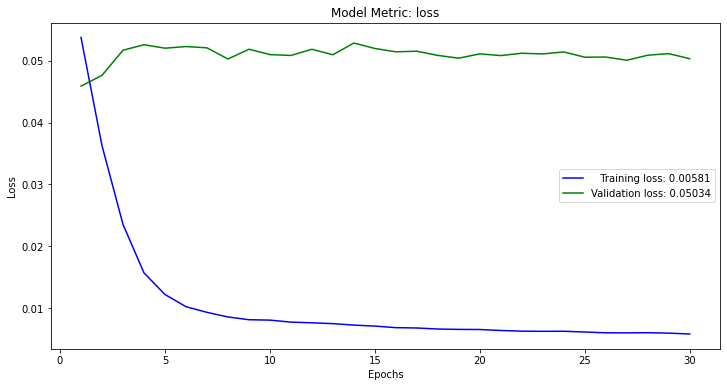

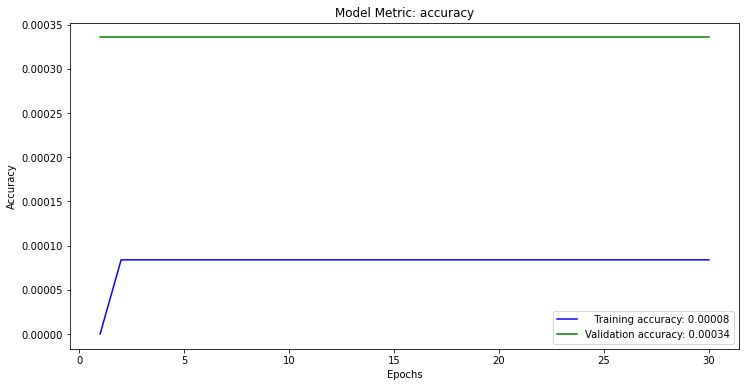

In [37]:
plot_keras_history(historyenergy)

In [38]:
%%time

print('Building Energy Model with SGD Optimizer..')

energymodelSGD = Sequential()

energymodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

energymodelSGD.add(Dense(256, activation='relu'))

energymodelSGD.add(Dense(1, activation='linear'))

energymodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historyenergySGD = energymodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_energy, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_energy))

energy_scores_SGD = energymodelSGD.evaluate(X_test_enc.todense(),y_test_energy, verbose=0)

Building Energy Model with SGD Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0655 - accuracy: 0.0000e+00 - val_loss: 0.0513 - val_accuracy: 3.3546e-04 - 3s/epoch - 7ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0513 - accuracy: 0.0000e+00 - val_loss: 0.0510 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 3/30
373/373 - 2s - loss: 0.0509 - accuracy: 0.0000e+00 - val_loss: 0.0506 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 4/30
373/373 - 2s - loss: 0.0506 - accuracy: 0.0000e+00 - val_loss: 0.0503 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 5/30
373/373 - 2s - loss: 0.0503 - accuracy: 0.0000e+00 - val_loss: 0.0501 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 6/30
373/373 - 2s - loss: 0.0500 - accuracy: 0.0000e+00 - val_loss: 0.0498 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 7/30
373/373 - 2s - loss: 0.0498 - accuracy: 0.0000e+00 - val_loss: 0.0497 - val_accuracy: 3.3546e-04 - 2s/epoch - 6ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0496 - accura

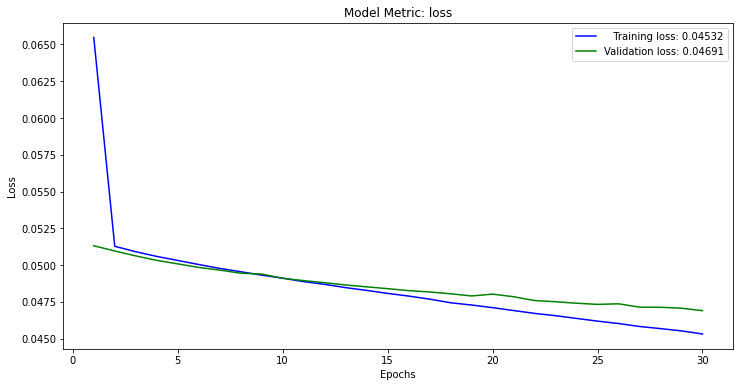

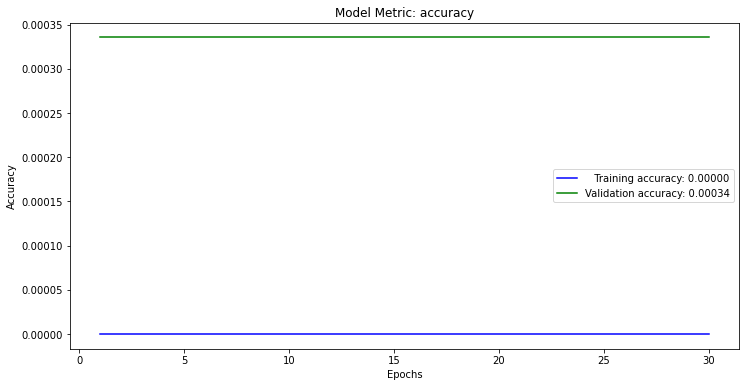

In [39]:
plot_keras_history(historyenergySGD)

# Popularity Model


In [40]:
%%time

print('Building Popularity Model with Adam Optimizer..')

popularitymodel = Sequential()

popularitymodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

popularitymodel.add(Dense(256, activation='relu'))

popularitymodel.add(Dense(1, activation='linear'))

popularitymodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historypopularity = popularitymodel.fit(x=X_train_enc.todense(),           
    y=y_train_popularity, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_popularity))

popularity_scores = popularitymodel.evaluate(X_test_enc.todense(),y_test_popularity, verbose=0)

Building Popularity Model with Adam Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0247 - accuracy: 0.0145 - val_loss: 0.0212 - val_accuracy: 0.0154 - 3s/epoch - 9ms/step
Epoch 2/30
373/373 - 5s - loss: 0.0159 - accuracy: 0.0155 - val_loss: 0.0220 - val_accuracy: 0.0154 - 5s/epoch - 12ms/step
Epoch 3/30
373/373 - 5s - loss: 0.0103 - accuracy: 0.0158 - val_loss: 0.0225 - val_accuracy: 0.0154 - 5s/epoch - 12ms/step
Epoch 4/30
373/373 - 5s - loss: 0.0069 - accuracy: 0.0158 - val_loss: 0.0218 - val_accuracy: 0.0151 - 5s/epoch - 13ms/step
Epoch 5/30
373/373 - 4s - loss: 0.0054 - accuracy: 0.0159 - val_loss: 0.0225 - val_accuracy: 0.0151 - 4s/epoch - 11ms/step
Epoch 6/30
373/373 - 5s - loss: 0.0045 - accuracy: 0.0159 - val_loss: 0.0223 - val_accuracy: 0.0151 - 5s/epoch - 12ms/step
Epoch 7/30
373/373 - 4s - loss: 0.0040 - accuracy: 0.0159 - val_loss: 0.0224 - val_accuracy: 0.0158 - 4s/epoch - 11ms/step
Epoch 8/30
373/373 - 4s - loss: 0.0038 - accuracy: 0.0159 - val_loss: 0.0226 - val_accuracy:

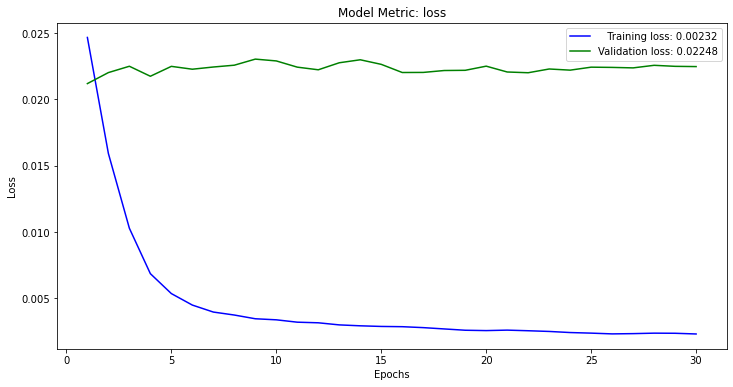

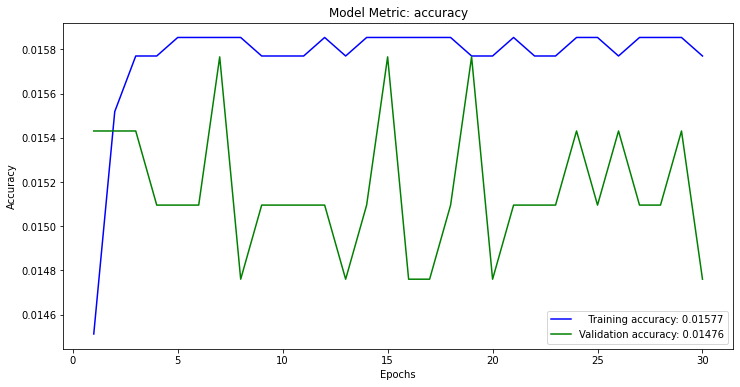

In [41]:
plot_keras_history(historypopularity)

In [42]:
%%time

print('Building Popularity Model with SGD Optimizer..')

popularitymodelSGD = Sequential()

popularitymodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

popularitymodelSGD.add(Dense(256, activation='relu'))

popularitymodelSGD.add(Dense(1, activation='linear'))

popularitymodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historypopularitySGD = popularitymodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_popularity, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_popularity))

popularity_scores_SGD = popularitymodelSGD.evaluate(X_test_enc.todense(),y_test_popularity, verbose=0)

Building Popularity Model with SGD Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0356 - accuracy: 0.0158 - val_loss: 0.0284 - val_accuracy: 0.0161 - 3s/epoch - 8ms/step
Epoch 2/30
373/373 - 5s - loss: 0.0273 - accuracy: 0.0158 - val_loss: 0.0278 - val_accuracy: 0.0161 - 5s/epoch - 14ms/step
Epoch 3/30
373/373 - 5s - loss: 0.0267 - accuracy: 0.0158 - val_loss: 0.0273 - val_accuracy: 0.0161 - 5s/epoch - 14ms/step
Epoch 4/30
373/373 - 5s - loss: 0.0262 - accuracy: 0.0158 - val_loss: 0.0267 - val_accuracy: 0.0161 - 5s/epoch - 14ms/step
Epoch 5/30
373/373 - 5s - loss: 0.0257 - accuracy: 0.0157 - val_loss: 0.0264 - val_accuracy: 0.0158 - 5s/epoch - 13ms/step
Epoch 6/30
373/373 - 5s - loss: 0.0252 - accuracy: 0.0157 - val_loss: 0.0258 - val_accuracy: 0.0158 - 5s/epoch - 14ms/step
Epoch 7/30
373/373 - 5s - loss: 0.0247 - accuracy: 0.0156 - val_loss: 0.0255 - val_accuracy: 0.0158 - 5s/epoch - 14ms/step
Epoch 8/30
373/373 - 5s - loss: 0.0243 - accuracy: 0.0156 - val_loss: 0.0249 - val_accuracy: 

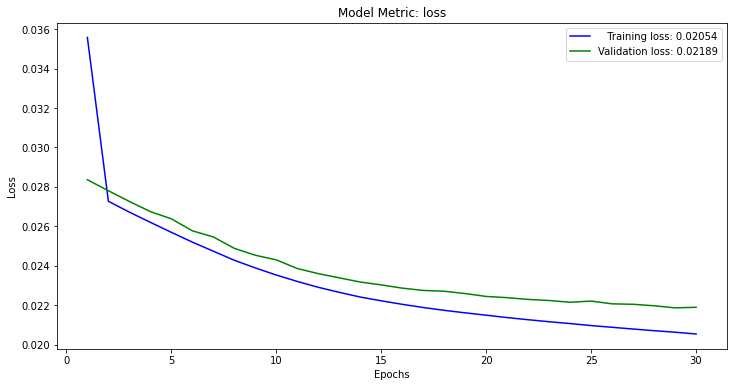

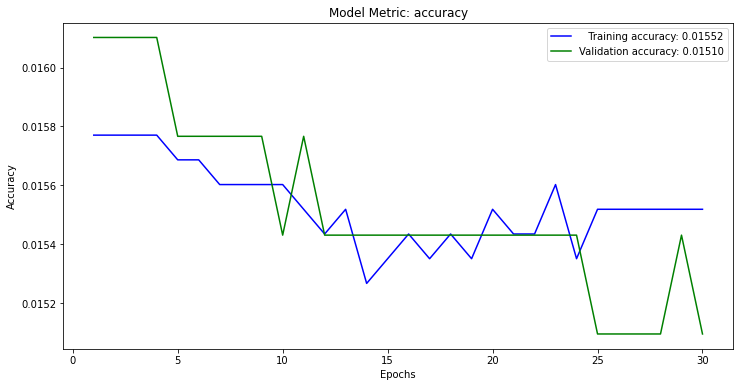

In [43]:
plot_keras_history(historypopularitySGD)

# Danceability Model

In [44]:
%%time

print('Building Danceability Model with Adam Optimizer..')

danceabilitymodel = Sequential()

danceabilitymodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

danceabilitymodel.add(Dense(256, activation='relu'))

danceabilitymodel.add(Dense(1, activation='linear'))

danceabilitymodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historydanceability = danceabilitymodel.fit(x=X_train_enc.todense(),           
    y=y_train_danceability, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_danceability))

danceability_scores= danceabilitymodel.evaluate(X_test_enc.todense(),y_test_danceability, verbose=0)

Building Danceability Model with Adam Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0327 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0000e+00 - 3s/epoch - 9ms/step
Epoch 2/30
373/373 - 3s - loss: 0.0210 - accuracy: 1.6777e-04 - val_loss: 0.0285 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 3/30
373/373 - 3s - loss: 0.0141 - accuracy: 1.6777e-04 - val_loss: 0.0295 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 4/30
373/373 - 3s - loss: 0.0095 - accuracy: 1.6777e-04 - val_loss: 0.0300 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 5/30
373/373 - 3s - loss: 0.0071 - accuracy: 1.6777e-04 - val_loss: 0.0304 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 6/30
373/373 - 3s - loss: 0.0057 - accuracy: 1.6777e-04 - val_loss: 0.0304 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 7/30
373/373 - 3s - loss: 0.0052 - accuracy: 1.6777e-04 - val_loss: 0.0303 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 8/30
373/373 - 3s - loss: 0.0049 -

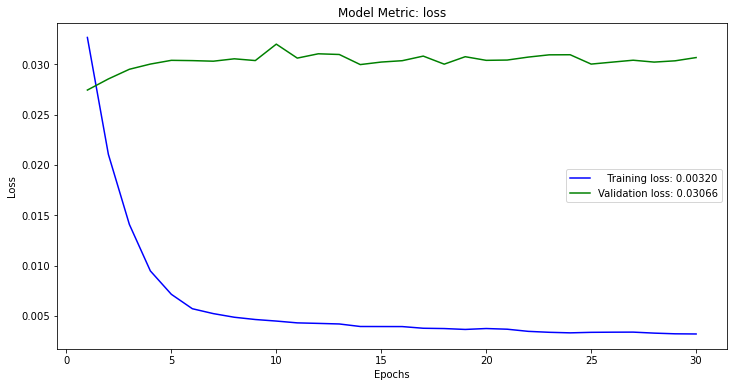

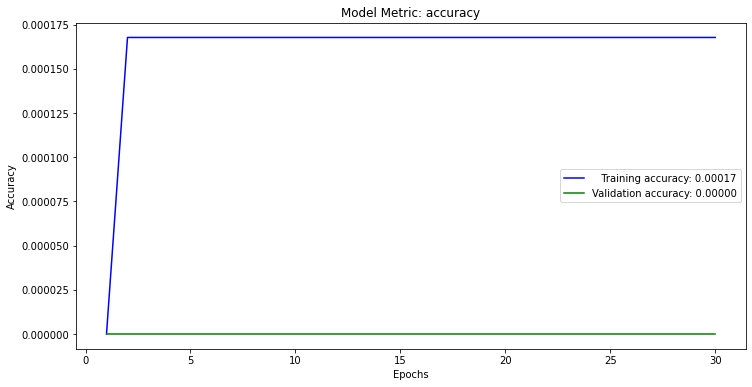

In [45]:
plot_keras_history(historydanceability)

In [46]:
%%time

print('Building Danceability Model with SGD optimizer..')

danceabilitymodelSGD = Sequential()

danceabilitymodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

danceabilitymodelSGD.add(Dense(256, activation='relu'))

danceabilitymodelSGD.add(Dense(1, activation='linear'))

danceabilitymodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historydanceabilitySGD = danceabilitymodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_danceability, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_danceability))

danceability_scores_SGD = danceabilitymodelSGD.evaluate(X_test_enc.todense(),y_test_danceability, verbose=0)	

Building Danceability Model with SGD optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0444 - accuracy: 0.0000e+00 - val_loss: 0.0331 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0313 - accuracy: 0.0000e+00 - val_loss: 0.0326 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 3/30
373/373 - 2s - loss: 0.0308 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 4/30
373/373 - 2s - loss: 0.0304 - accuracy: 0.0000e+00 - val_loss: 0.0319 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 5/30
373/373 - 2s - loss: 0.0300 - accuracy: 0.0000e+00 - val_loss: 0.0314 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 6/30
373/373 - 2s - loss: 0.0297 - accuracy: 0.0000e+00 - val_loss: 0.0311 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 7/30
373/373 - 2s - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.0308 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0290 - 

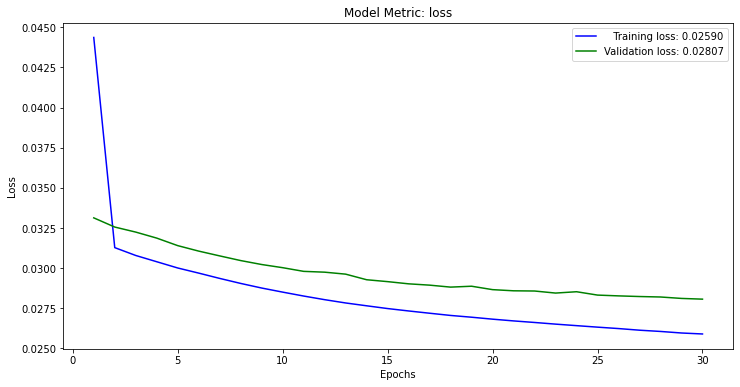

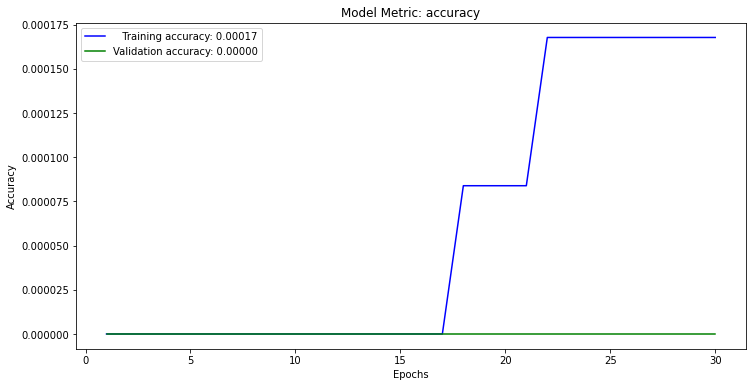

In [47]:
plot_keras_history(historydanceabilitySGD)

# Valence Model

In [48]:
%%time

print('Building Valence Model with Adam Optimizer..')

valencemodel = Sequential()

valencemodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

valencemodel.add(Dense(256, activation='relu'))

valencemodel.add(Dense(1, activation='linear'))

valencemodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historyvalence = valencemodel.fit(x=X_train_enc.todense(),           
    y=y_train_valence, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_valence))

valence_scores = valencemodel.evaluate(X_test_enc.todense(),y_test_valence, verbose=0)

Building Valence Model with Adam Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0605 - accuracy: 8.3886e-05 - val_loss: 0.0560 - val_accuracy: 0.0000e+00 - 3s/epoch - 9ms/step
Epoch 2/30
373/373 - 3s - loss: 0.0437 - accuracy: 0.0000e+00 - val_loss: 0.0591 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 3/30
373/373 - 3s - loss: 0.0263 - accuracy: 8.3886e-05 - val_loss: 0.0618 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 4/30
373/373 - 3s - loss: 0.0166 - accuracy: 8.3886e-05 - val_loss: 0.0652 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 5/30
373/373 - 3s - loss: 0.0126 - accuracy: 8.3886e-05 - val_loss: 0.0641 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 6/30
373/373 - 3s - loss: 0.0105 - accuracy: 8.3886e-05 - val_loss: 0.0649 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 7/30
373/373 - 3s - loss: 0.0093 - accuracy: 8.3886e-05 - val_loss: 0.0641 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 8/30
373/373 - 3s - loss: 0.0087 - accu

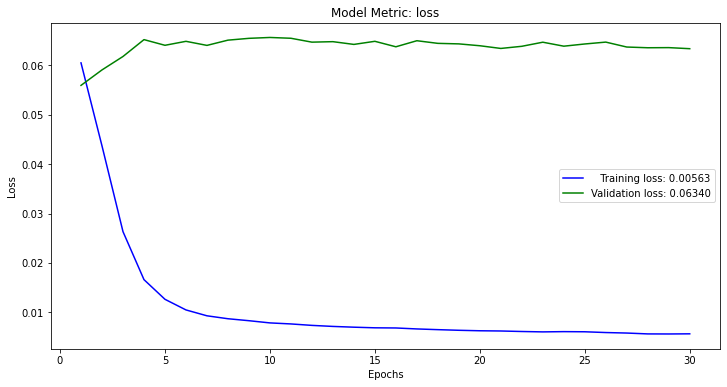

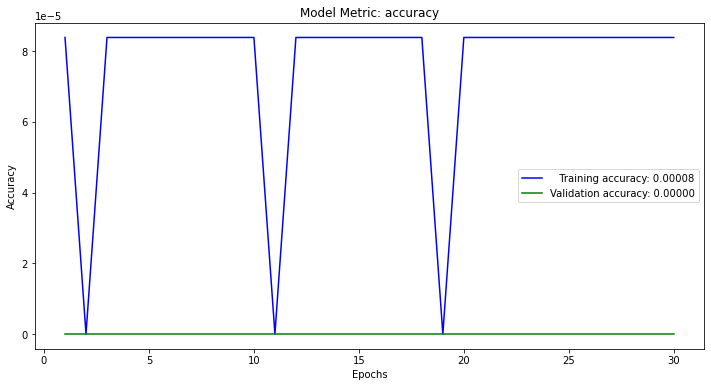

In [49]:
plot_keras_history(historyvalence)

In [50]:
%%time

print('Building Valence Model with SGD optimizer..')

valencemodelSGD = Sequential()

valencemodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

valencemodelSGD.add(Dense(256, activation='relu'))

valencemodelSGD.add(Dense(1, activation='linear'))

valencemodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historyvalenceSGD = valencemodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_valence, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_valence))

valence_scores_SGD = valencemodelSGD.evaluate(X_test_enc.todense(),y_test_valence, verbose=0)	

Building Valence Model with SGD optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0699 - accuracy: 8.3886e-05 - val_loss: 0.0618 - val_accuracy: 0.0000e+00 - 3s/epoch - 9ms/step
Epoch 2/30
373/373 - 3s - loss: 0.0608 - accuracy: 8.3886e-05 - val_loss: 0.0614 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 3/30
373/373 - 3s - loss: 0.0603 - accuracy: 8.3886e-05 - val_loss: 0.0610 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 4/30
373/373 - 3s - loss: 0.0598 - accuracy: 8.3886e-05 - val_loss: 0.0606 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 5/30
373/373 - 3s - loss: 0.0594 - accuracy: 8.3886e-05 - val_loss: 0.0603 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 6/30
373/373 - 2s - loss: 0.0590 - accuracy: 8.3886e-05 - val_loss: 0.0600 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 7/30
373/373 - 2s - loss: 0.0587 - accuracy: 8.3886e-05 - val_loss: 0.0598 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0584 - accur

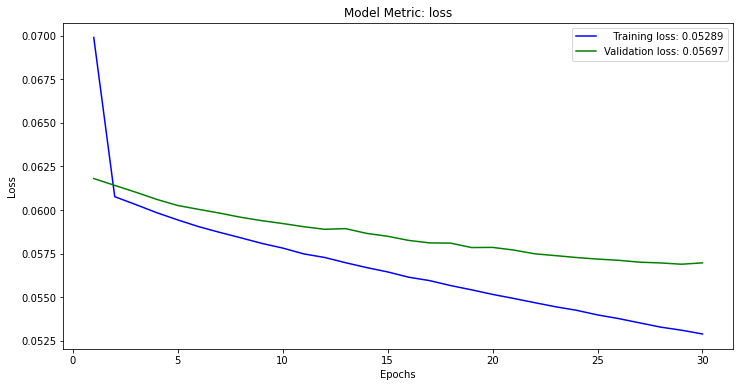

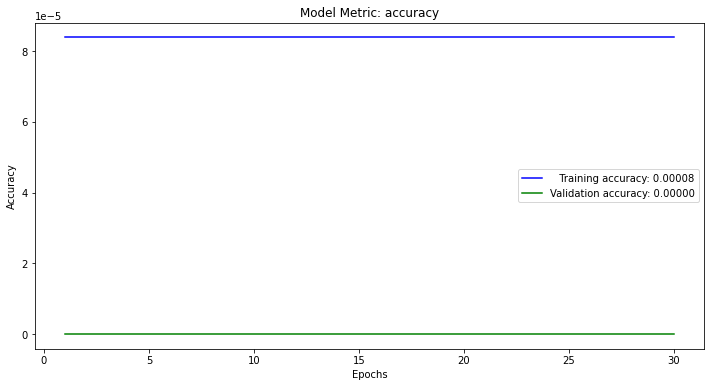

In [51]:
plot_keras_history(historyvalenceSGD)

# Acousticness Model

In [52]:
%%time

print('Building Acousticness Model with Adam Optimizer..')

acousticnessmodel = Sequential()

acousticnessmodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

acousticnessmodel.add(Dense(256, activation='relu'))

acousticnessmodel.add(Dense(1, activation='linear'))

acousticnessmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historyacousticness = acousticnessmodel.fit(x=X_train_enc.todense(),           
    y=y_train_acousticness, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_acousticness))

acousticness_scores = acousticnessmodel.evaluate(X_test_enc.todense(),y_test_acousticness, verbose=0)


Building Acousticness Model with Adam Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0850 - accuracy: 2.5166e-04 - val_loss: 0.0812 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0631 - accuracy: 4.1943e-04 - val_loss: 0.0841 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 3/30
373/373 - 3s - loss: 0.0363 - accuracy: 4.1943e-04 - val_loss: 0.0895 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 4/30
373/373 - 3s - loss: 0.0228 - accuracy: 3.3554e-04 - val_loss: 0.0920 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 5/30
373/373 - 3s - loss: 0.0173 - accuracy: 4.1943e-04 - val_loss: 0.0929 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 6/30
373/373 - 3s - loss: 0.0148 - accuracy: 4.1943e-04 - val_loss: 0.0915 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 7/30
373/373 - 3s - loss: 0.0133 - accuracy: 4.1943e-04 - val_loss: 0.0960 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 8/30
373/373 - 3s - loss: 0.0125 -

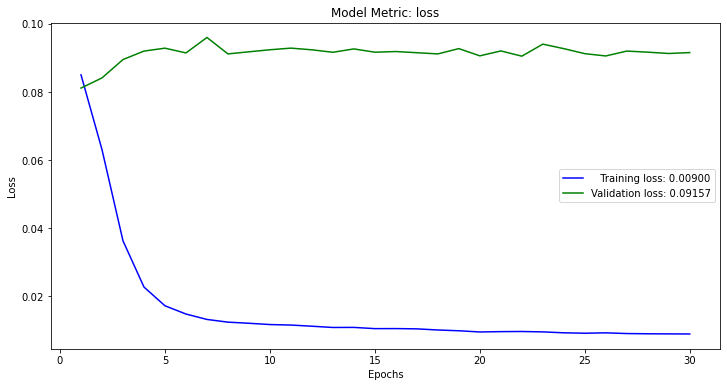

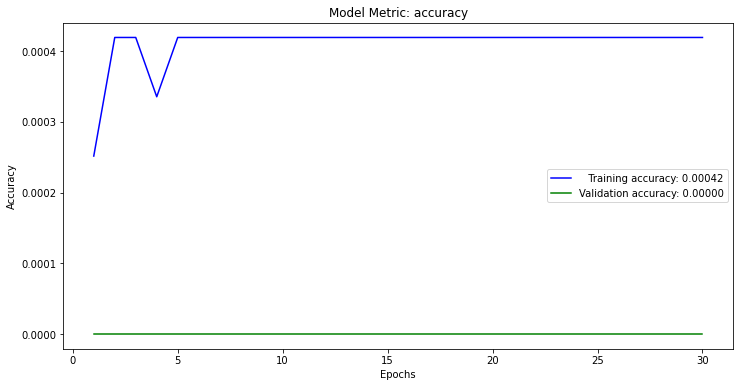

In [53]:
plot_keras_history(historyacousticness)

In [54]:
%%time

print('Building Acousticness Model with SGD optimizer..')

acousticnessmodelSGD = Sequential()

acousticnessmodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

acousticnessmodelSGD.add(Dense(256, activation='relu'))

acousticnessmodelSGD.add(Dense(1, activation='linear'))

acousticnessmodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historyacousticnessSGD = acousticnessmodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_acousticness, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_acousticness))

acousticness_scores_SGD = acousticnessmodelSGD.evaluate(X_test_enc.todense(),y_test_acousticness, verbose=0)	

Building Acousticness Model with SGD optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0985 - accuracy: 8.3886e-05 - val_loss: 0.0948 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0943 - accuracy: 8.3886e-05 - val_loss: 0.0944 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 3/30
373/373 - 2s - loss: 0.0934 - accuracy: 8.3886e-05 - val_loss: 0.0934 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 4/30
373/373 - 2s - loss: 0.0926 - accuracy: 8.3886e-05 - val_loss: 0.0927 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 5/30
373/373 - 2s - loss: 0.0917 - accuracy: 8.3886e-05 - val_loss: 0.0921 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 6/30
373/373 - 2s - loss: 0.0908 - accuracy: 8.3886e-05 - val_loss: 0.0913 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 7/30
373/373 - 2s - loss: 0.0900 - accuracy: 8.3886e-05 - val_loss: 0.0907 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0891 - 

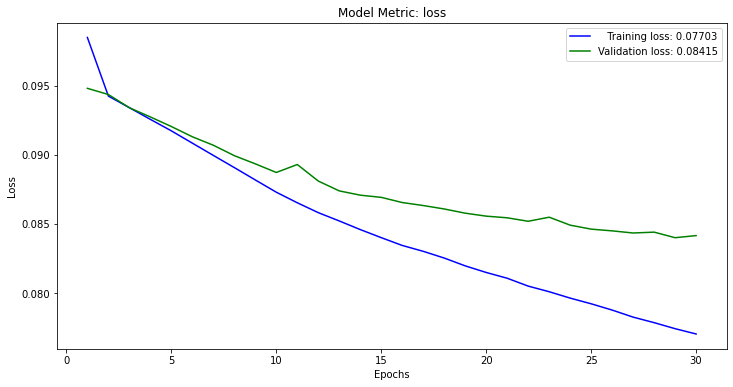

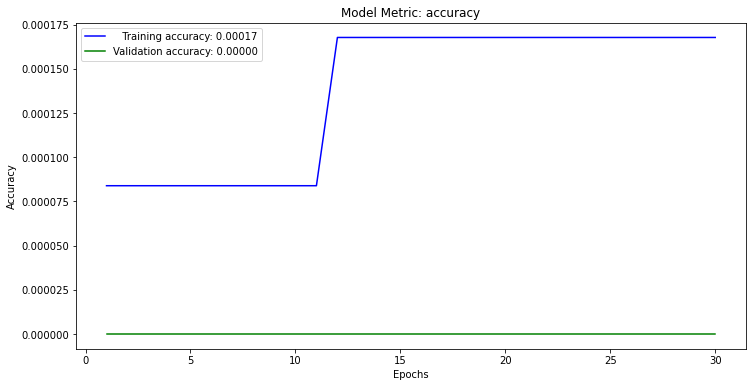

In [55]:
plot_keras_history(historyacousticnessSGD)

# Liveness Model

In [56]:
%%time

print('Building Liveness Model with Adam Optimizer ..')

livenessmodel = Sequential()

livenessmodel.add(Dense(256, input_shape=(max_words,), activation='relu'))

livenessmodel.add(Dense(256, activation='relu'))

livenessmodel.add(Dense(1, activation='linear'))

livenessmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

historyliveness = livenessmodel.fit(x=X_train_enc.todense(),           
    y=y_train_liveness, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_liveness))

liveness_scores = livenessmodel.evaluate(X_test_enc.todense(),y_test_liveness, verbose=0)


Building Liveness Model with Adam Optimizer ..
Epoch 1/30
373/373 - 3s - loss: 0.0355 - accuracy: 0.0000e+00 - val_loss: 0.0360 - val_accuracy: 0.0000e+00 - 3s/epoch - 9ms/step
Epoch 2/30
373/373 - 3s - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0379 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 3/30
373/373 - 3s - loss: 0.0176 - accuracy: 0.0000e+00 - val_loss: 0.0396 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 4/30
373/373 - 3s - loss: 0.0118 - accuracy: 8.3886e-05 - val_loss: 0.0410 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 5/30
373/373 - 3s - loss: 0.0095 - accuracy: 8.3886e-05 - val_loss: 0.0409 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 6/30
373/373 - 3s - loss: 0.0083 - accuracy: 8.3886e-05 - val_loss: 0.0411 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 7/30
373/373 - 3s - loss: 0.0075 - accuracy: 8.3886e-05 - val_loss: 0.0409 - val_accuracy: 0.0000e+00 - 3s/epoch - 7ms/step
Epoch 8/30
373/373 - 3s - loss: 0.0069 - ac

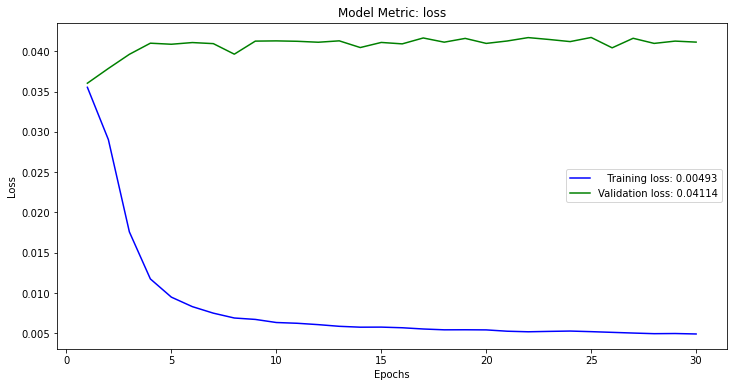

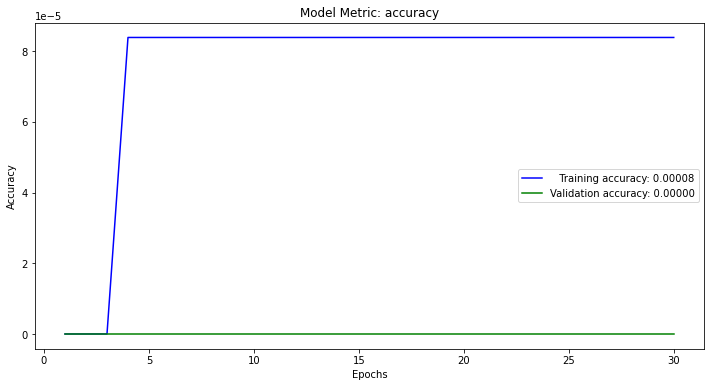

In [57]:
plot_keras_history(historyliveness)

In [58]:
%%time

print('Building Liveness Model with SGD Optimizer..')

livenessmodelSGD = Sequential()

livenessmodelSGD.add(Dense(256, input_shape=(max_words,), activation='relu'))

livenessmodelSGD.add(Dense(256, activation='relu'))

livenessmodelSGD.add(Dense(1, activation='linear'))

livenessmodelSGD.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

historylivenessSGD = livenessmodelSGD.fit(x=X_train_enc.todense(),           
    y=y_train_liveness, epochs=nb_epoch,batch_size=batch_size, verbose=2,
    validation_data=(       
    X_val_enc.todense(),
    y_val_liveness))

liveness_scores_SGD = livenessmodelSGD.evaluate(X_test_enc.todense(),y_test_liveness, verbose=0)	

Building Liveness Model with SGD Optimizer..
Epoch 1/30
373/373 - 3s - loss: 0.0375 - accuracy: 0.0000e+00 - val_loss: 0.0366 - val_accuracy: 0.0000e+00 - 3s/epoch - 8ms/step
Epoch 2/30
373/373 - 2s - loss: 0.0360 - accuracy: 0.0000e+00 - val_loss: 0.0365 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 3/30
373/373 - 2s - loss: 0.0359 - accuracy: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 4/30
373/373 - 2s - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0363 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 5/30
373/373 - 2s - loss: 0.0356 - accuracy: 0.0000e+00 - val_loss: 0.0362 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 6/30
373/373 - 2s - loss: 0.0355 - accuracy: 0.0000e+00 - val_loss: 0.0361 - val_accuracy: 0.0000e+00 - 2s/epoch - 6ms/step
Epoch 7/30
373/373 - 2s - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0360 - val_accuracy: 0.0000e+00 - 2s/epoch - 5ms/step
Epoch 8/30
373/373 - 2s - loss: 0.0353 - accu

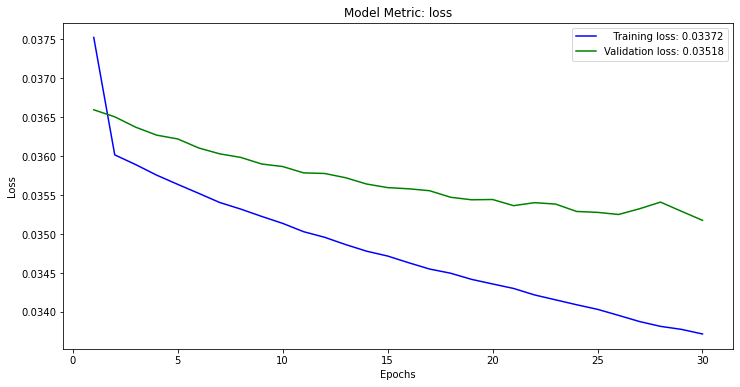

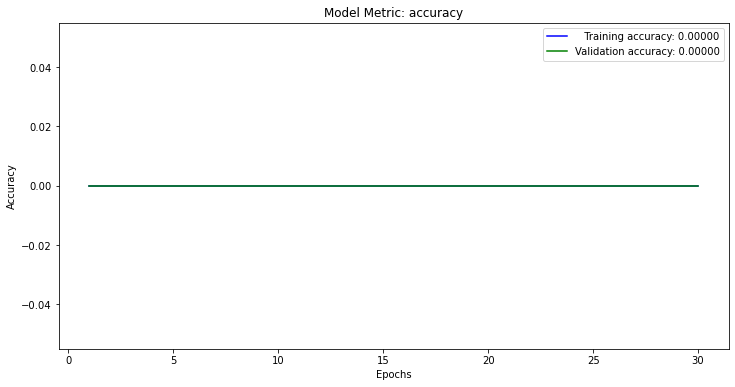

In [59]:
plot_keras_history(historylivenessSGD)

# Test Predictive Ability

In [60]:
import matplotlib.pyplot as plt

In [61]:
print('For the Energy Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(energy_scores[0],4))
print('For the Energy Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(energy_scores_SGD[0],4))

For the Energy Model, with the Adam Optimizer, the Mean Squared Error is:
0.0511
For the Energy Model, with the SGD Optimizer, the Mean Squared Error is:
0.0452


In [62]:
energyweights = energymodelSGD.get_weights()
energymodelSGD.save_weights('energyweights.h5')

In [63]:
print('For the Popularity Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(popularity_scores[0],4))
print('For the Popularity Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(popularity_scores_SGD[0],4))

For the Popularity Model, with the Adam Optimizer, the Mean Squared Error is:
0.0239
For the Popularity Model, with the SGD Optimizer, the Mean Squared Error is:
0.0232


In [64]:
popularityweights = popularitymodel.get_weights()
popularitymodel.save_weights('popularityweights.h5')

In [65]:
print('For the Danceability Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(danceability_scores[0],4))
print('For the Danceability Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(danceability_scores_SGD[0],4))

For the Danceability Model, with the Adam Optimizer, the Mean Squared Error is:
0.0289
For the Danceability Model, with the SGD Optimizer, the Mean Squared Error is:
0.0265


In [66]:
danceabilityweights = danceabilitymodelSGD.get_weights()
danceabilitymodelSGD.save_weights('danceabilityweights.h5')

In [67]:
print('For the Valence Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(valence_scores[0],4))
print('For the Valence Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(valence_scores_SGD[0],4))

For the Valence Model, with the Adam Optimizer, the Mean Squared Error is:
0.0608
For the Valence Model, with the SGD Optimizer, the Mean Squared Error is:
0.0546


In [68]:
valenceweights = valencemodelSGD.get_weights()
valencemodelSGD.save_weights('valenceweights.h5')

In [69]:
print('For the Acousticness Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(acousticness_scores[0],4))
print('For the Acousticness Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(acousticness_scores_SGD[0],4))

For the Acousticness Model, with the Adam Optimizer, the Mean Squared Error is:
0.0929
For the Acousticness Model, with the SGD Optimizer, the Mean Squared Error is:
0.0838


In [70]:
acousticnessweights = acousticnessmodelSGD.get_weights()
acousticnessmodelSGD.save_weights('acousticnessweights.h5')

In [71]:
print('For the Liveness Model, with the Adam Optimizer, the Mean Squared Error is:')
print(round(liveness_scores[0],4))
print('For the Liveness Model, with the SGD Optimizer, the Mean Squared Error is:')
print(round(liveness_scores_SGD[0],4))

For the Liveness Model, with the Adam Optimizer, the Mean Squared Error is:
0.0408
For the Liveness Model, with the SGD Optimizer, the Mean Squared Error is:
0.0349


In [72]:
livenessweights = livenessmodelSGD.get_weights()
livenessmodelSGD.save_weights('livenessweights.h5')

In [73]:
df = pd.DataFrame(columns=['Audio Feature','Optimizer','MSE'])

df = df.append({'Audio Feature': 'Energy', 'Optimizer': 'Adam', 'MSE': round(energy_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Energy', 'Optimizer': 'SGD', 'MSE': round(energy_scores_SGD[0],4)},ignore_index = True)

df = df.append({'Audio Feature': 'Popularity', 'Optimizer': 'Adam', 'MSE': round(popularity_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Popularity', 'Optimizer': 'SGD', 'MSE': round(popularity_scores_SGD[0],4)},ignore_index = True)

df = df.append({'Audio Feature': 'Danceability', 'Optimizer': 'Adam', 'MSE': round(danceability_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Danceability', 'Optimizer': 'SGD', 'MSE': round(danceability_scores_SGD[0],4)},ignore_index = True)

df = df.append({'Audio Feature': 'Valence', 'Optimizer': 'Adam', 'MSE': round(valence_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Valence', 'Optimizer': 'SGD', 'MSE': round(valence_scores_SGD[0],4)},ignore_index = True)

df = df.append({'Audio Feature': 'Acousticness', 'Optimizer': 'Adam', 'MSE': round(acousticness_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Acousticness', 'Optimizer': 'SGD', 'MSE': round(acousticness_scores_SGD[0],4)},ignore_index = True)

df = df.append({'Audio Feature': 'Liveness', 'Optimizer': 'Adam', 'MSE': round(liveness_scores[0],4)},ignore_index = True)
df = df.append({'Audio Feature': 'Liveness', 'Optimizer': 'SGD', 'MSE': round(liveness_scores_SGD[0],4)},ignore_index = True)

In [74]:
df['Audio Feature'] = df['Audio Feature'].astype('category')
df['Optimizer'] = df['Optimizer'].astype('category')

In [75]:
dfen = df[df['Audio Feature']=='Energy']
dfpop = df[df['Audio Feature']=='Popularity']
dfdnc = df[df['Audio Feature']=='Danceability']
dfval = df[df['Audio Feature']=='Valence']
dfac = df[df['Audio Feature']=='Acousticness']
dfliv = df[df['Audio Feature']=='Liveness']

In [77]:
import seaborn as sns

Text(0.5, 1.0, 'Liveness Plot')

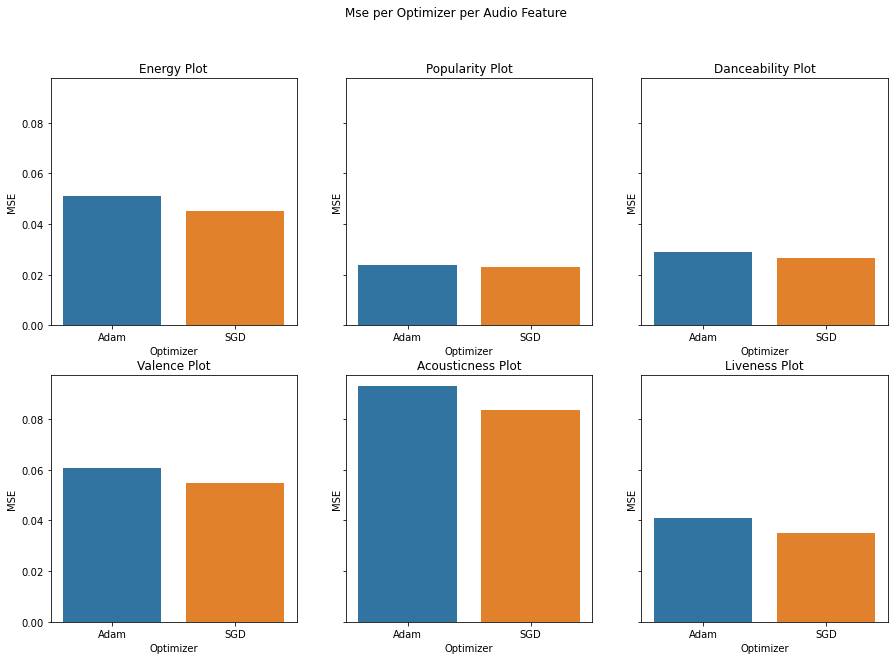

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('Mse per Optimizer per Audio Feature')
sns.barplot(ax=axes[0,0],x=dfen['Optimizer'], y=dfen['MSE'], data=dfen, ci=0)
axes[0,0].set_title('Energy Plot')
sns.barplot(ax=axes[0,1],x=dfpop['Optimizer'], y=dfpop['MSE'], data=dfpop, ci=0)
axes[0,1].set_title('Popularity Plot')
sns.barplot(ax=axes[0,2],x=dfdnc['Optimizer'], y=dfdnc['MSE'], data=dfdnc, ci=0)
axes[0,2].set_title('Danceability Plot')
sns.barplot(ax=axes[1,0],x=dfval['Optimizer'], y=dfval['MSE'], data=dfval, ci=0)
axes[1,0].set_title('Valence Plot')
sns.barplot(ax=axes[1,1],x=dfac['Optimizer'], y=dfac['MSE'], data=dfac, ci=0)
axes[1,1].set_title('Acousticness Plot')
sns.barplot(ax=axes[1,2],x=dfliv['Optimizer'], y=dfliv['MSE'], data=dfliv, ci=0)
axes[1,2].set_title('Liveness Plot')




# Predict

In [79]:
pool['comp'] = pool.iloc[:,4:10].values.tolist()

In [80]:
print('Input sentence')
print(40*'-')
input_text = input()
print(40*'*')

text_vectorized = vectorizer.transform([input_text])

energypred = energymodelSGD.predict(text_vectorized.todense())
popularitypred = popularitymodelSGD.predict(text_vectorized.todense())
danceabilitypred = danceabilitymodelSGD.predict(text_vectorized.todense())
valencepred = valencemodelSGD.predict(text_vectorized.todense())
acousticnesspred = acousticnessmodelSGD.predict(text_vectorized.todense())
livenesspred = livenessmodelSGD.predict(text_vectorized.todense())


print('Energy Predicted:', end='\n')
print(energypred[0][0])

print('Popularity Predicted:', end='\n')
print(popularitypred[0][0])

print('Danceability Predicted:', end='\n')
print(danceabilitypred[0][0])

print('Valence Predicted:', end='\n')
print(valencepred[0][0])

print('Acousticness Predicted:', end='\n')
print(acousticnesspred[0][0])

print('Liveness Predicted:', end='\n')
print(livenesspred[0][0])

comparelist = [energypred[0][0],popularitypred[0][0],danceabilitypred[0][0],valencepred[0][0],acousticnesspred[0][0],livenesspred[0][0]]

Input sentence
----------------------------------------
ADASDASA
****************************************
1/1 [==============================] - 0s 54ms/step
Energy Predicted:
0.64802766
Popularity Predicted:
0.49386036
Danceability Predicted:
0.55005795
Valence Predicted:
0.45519486
Acousticness Predicted:
0.2401977
Liveness Predicted:
0.1797706


In [81]:
from scipy import spatial

data=pool.copy()
data=data[data['popularity']>0.60]
s=data['comp'].apply(lambda x: spatial.distance.euclidean(x, comparelist) )
data=data.assign(similarity=s)
data = data[data['similarity']<.5]

data['met']=data['similarity'].apply(lambda x: x*0.8)-(data['popularity']*0.9)

final = data.sort_values('met',ascending=True)

In [82]:
final.head(50)

,release_date,id,name,artists,energy,popularity,danceability,valence,acousticness,liveness,comp,Y,similarity,met
93978,2021-01-29,6u3CPnFMKANYgfdiifFOiJ,"Gravity (feat. Tyler, The Creator)","Brent Faiyaz, DJ Dahi, Tyler, The Creator",0.615,0.81,0.543895,0.493,0.173695,0.1440,"[0.615, 0.81, 0.5438950554994955, 0.493, 0.173...",2021,0.328944,-0.465844
94024,2021-03-10,45kgqMRkC29qjBlzeaJcad,Street Runner,Rod Wave,0.610,0.80,0.618567,0.433,0.211847,0.1520,"[0.61, 0.8, 0.6185671039354187, 0.433, 0.21184...",2021,0.319263,-0.464590
93141,2020-10-23,6IBcOGPsniK3Pso1wHIhew,Forever After All,Luke Combs,0.650,0.82,0.491423,0.456,0.191767,0.0933,"[0.65, 0.8200000000000001, 0.491422805247225, ...",2020,0.345879,-0.461297
86018,2013-09-09,5FVd6KXrgO9B3JPmC8OPst,Do I Wanna Know?,Arctic Monkeys,0.532,0.87,0.552977,0.405,0.186747,0.2170,"[0.532, 0.87, 0.5529767911200808, 0.405, 0.186...",2013,0.402137,-0.461290
93888,2021-03-26,2FSGUA0gFgGeQdprjtGM2M,EL MAKINON,"KAROL G, Mariah Angeliq",0.706,0.84,0.640767,0.443,0.257028,0.1080,"[0.706, 0.84, 0.6407669021190716, 0.443, 0.257...",2021,0.370114,-0.459909
85063,2012-09-04,5qaEfEh1AtSdrdrByCP7qR,Demons,Imagine Dragons,0.710,0.82,0.509586,0.428,0.190763,0.2690,"[0.71, 0.8200000000000001, 0.5095862764883955,...",2012,0.350700,-0.457440
92451,2019-09-06,2C6WXnmZ66tHhHlnvwePiK,Die For Me (feat. Future & Halsey),"Post Malone, Halsey, Future",0.660,0.75,0.619576,0.452,0.190763,0.2110,"[0.66, 0.75, 0.6195761856710393, 0.452, 0.1907...",2019,0.272053,-0.457358
92043,2019-12-27,40mjsnRjCpycdUw3xhS20g,GATTI,"JACKBOYS, Pop Smoke, Travis Scott",0.676,0.80,0.599395,0.472,0.135542,0.1630,"[0.676, 0.8, 0.5993945509586276, 0.472, 0.1355...",2019,0.329324,-0.456541
158717,2020-12-15,4hnwfhQbZKaNpC1q9zgB4A,Extasy,Myke Towers,0.667,0.73,0.531786,0.463,0.288153,0.1130,"[0.667, 0.73, 0.5317860746720484, 0.463, 0.288...",2020,0.251545,-0.455764
74448,2001-03-27,2hKdd3qO7cWr2Jo0Bcs0MA,Drops of Jupiter (Tell Me),Train,0.638,0.79,0.485368,0.497,0.153614,0.1540,"[0.638, 0.79, 0.48536831483350146, 0.497, 0.15...",2001,0.319206,-0.455635


In [83]:
tracks = final['id'].head(50)

# Spotify

In [84]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth
from spotipy import oauth2

In [85]:
    import spotconfig as conf

    scopelist = ['ugc-image-upload',
    'user-modify-playback-state',
    'user-follow-modify',
    'user-read-recently-played',
    'user-read-playback-position',
    'playlist-read-collaborative',
    'app-remote-control',
    'user-read-playback-state',
    'user-read-email',
    'streaming',
    'user-top-read',
    'playlist-modify-public',
    'user-library-modify',
    'user-follow-read',
    'user-read-currently-playing',
    'user-library-read',
    'playlist-read-private',
    'user-read-private',
    'playlist-modify-private']


In [86]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = conf.Client_ID
secret = conf.Client_Secret
redirect_kostas='https://www.google.com/'
username = 'kharzzz'

In [87]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cid,client_secret=secret,redirect_uri=redirect_kostas,scope=scopelist))

In [89]:
user = me['id']

# The Desired Function

In [94]:
def get_playlist():
    print('How do you feel today?')
    print(40*'-')
    input_text = input()
    print(40*'*')

    text_vectorized = vectorizer.transform([input_text])

    energypred = energymodelSGD.predict(text_vectorized.todense())
    popularitypred = popularitymodelSGD.predict(text_vectorized.todense())
    danceabilitypred = danceabilitymodelSGD.predict(text_vectorized.todense())
    valencepred = valencemodelSGD.predict(text_vectorized.todense())
    acousticnesspred = acousticnessmodelSGD.predict(text_vectorized.todense())
    livenesspred = livenessmodelSGD.predict(text_vectorized.todense())
    comparelist = [energypred[0][0],popularitypred[0][0],danceabilitypred[0][0],valencepred[0][0],acousticnesspred[0][0],livenesspred[0][0]]
    
    from scipy import spatial

    data=pool.copy()
    data=data[data['popularity']>0.60]
    s=data['comp'].apply(lambda x: spatial.distance.euclidean(x, comparelist) )
    data=data.assign(similarity=s)
    data = data[data['similarity']<.5]

    data['met']=data['similarity'].apply(lambda x: x*0.8)-(data['popularity']*0.9)

    final = data.sort_values('met',ascending=True)
    
    tracks = final['id'].head(50)
    
    # Insert your Spotify username and the credentials that you obtained from spotify developer
    cid = conf.Client_ID
    secret = conf.Client_Secret
    redirect_kostas='https://www.google.com/'
    username = 'kharzzz'
    
    print('Please insert the desired name for your playlist:')
    playname = input()
    user = me['id']
    playlist = sp.user_playlist_create(user = user,
                        name=playname,
                        description=f"{input_text}",)
    
    playlist_id = playlist['id']
    
    sp.user_playlist_add_tracks(user, playlist_id=playlist_id, tracks=tracks)

In [95]:
get_playlist()

How do you feel today?
----------------------------------------
Today I feel great, went for a walk in the park and then came back home to listen to my favorite songs and to drink a glass of wine
****************************************
1/1 [==============================] - 0s 17ms/step
Please insert the desired name for your playlist:
Post Sunday Walk list
